<h1><strong>CSCI 4455/5455 &ndash; Fall 2021</strong></h1>

<h2><strong>Assignment 4 - Cluster Analysis</strong></h2>

<h3><strong><span style="color:#cc3300;">Due: December 10, 11:59pm </span></strong></h3>

<h3><strong>Your name:</strong></h3>

<ul>
<li style="text-align: justify;">Please note that you must do this assignment&nbsp;<span style="color: #cc3300;"><strong><u>individually</u></strong></span>. Using automatic tools, your code will be checked against other submissions and other existing resources (such as websites and books).</li>
<li style="text-align: justify;">Review the lecture notes before starting with this assignment. Then, thoroughly read this document before starting with the implementation or thinking about the solution.</li>
<li style="text-align: justify;">If you have technical questions about Python, please Google the error messages and share the error message alongside the solution that got it fixed on Microsoft Teams, as your classmates may run into the same issues.</li>
<li style="text-align: justify;">Check Canvas regularly for possible clarifications and updates.</li>
<li style="text-align: justify;">There are libraries and scripts for clustering, but you are <span style="color: #cc3300;"><strong>prohibited to use these existing resources</strong></span>, which means you <span style="color: #cc3300;"><strong>cannot include public libraries</strong></span>, or <span style="color: #cc3300;"><strong>modify existing programs</strong></span> since the purpose   of   this   programming   assignment   is   to   help you understand and implement DBScan algorithm. You need to develop your code from scratch.</li>
</ul>


<h2><strong>Assignment Objectives</strong></h2>
<li style="text-align: justify;">1. To implement the <span style="color: #339966;"><strong>DBScan</strong></span> algorithm and test it under different configurations</li>
<li style="text-align: justify;">2. To evaluate the quality of the clusterings</li>
<li style="text-align: justify;">3. To visualize clusterings</li>

<h2>Dataset</h2>

<p style="text-align: justify;">In this assignment, three datasets with different shapes and numbers of clusters are provided that the k-means algorithm fails to cluster correctly. Each dataset contains 1500 samples, and each sample has two dimensions (x and y).  
</p>

<h2>Implementation</h2>

<p style="text-align: justify;">Please consider the following in your implementation:<br>
    
<ul>

<li style="text-align: justify;">You are not allowed to use frequent itemset mining libraries and need to implement your code from scratch. However, you are allowed to use Python built-in functions, such as min, max, average, map, apply, reduce, etc. You are allowed to use numpy and matplolib</li>
<li style="text-align: justify;">Ensure that the cells in your Notebook are ordered correctly so that the “run all” option can run all cells without running to dependency issues.</li>
<li style="text-align: justify;">Your code should be self-explanatory. Make sure you add comments and your output files are formatted correctly. You might lose up to 30 points for bad code quality (readability, modularity, comments, efficiency, etc.) and formatting of the output files.</li>
</ul>

</p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import time

dataset_name = 'moons.csv' # dataset_name: this is the dataset name (such as moons.csv). 
                          # Assume the dataset is located in the same folder as your notebook.
min_points =   []         # a list of integers indicating the minimum number of points required in the neighborhood of a core object
epsilons =     []         # a list of floats for neighborhood radius


<h2>Implement the DBScan  Algorithm (30 Points)</h2>

<p style="text-align: justify;">Implement the DBScan algorithm, as discussed in the lecture notes. You need a function named dbscan that takes three arguments (dataset, epsilon, and min_points) and returns a clustering.
</p>

In [2]:
dataset = pd.read_csv(dataset_name, names = ["point_x","point_y"])

In [3]:
def euclidean_dis(point_q, point_p):
    """
        Calculates the Euclidean distance
        between 2 points
    """
    
    
    a = (point_q[0] - point_p[0])**2
    b = (point_q[1] - point_p[1])**2
    return np.sqrt(a + b)


def find_neighbours(db, q, epsilon):
    """
        Finds all points in the whole database that
        are within a distance of eps from Q
    """
    return list(filter(lambda p: euclidean_dis(q, p) <= epsilon, db))

In [4]:
def dbscan(db,eps,min_pts):
    c = 0
    clusters = []
    db = {(point[0],point[1]):{'cluster':"Not Assigned"} for idx, point in db.iterrows()}
    
    for p in db:
        if db[p]["cluster"] != "Not Assigned":
            continue
        neighbors = find_neighbours(db, p, eps)
        if len(neighbors) < min_pts:
            db[p]["cluster"] = "outlier"
        else:
            c += 1
            clusters.append(c)
            db[p]["cluster"] = c
            neighbors.remove(p)
            cur_neighbor_set = neighbors.copy()
            while cur_neighbor_set != []:
                q = cur_neighbor_set.pop(0)
                if db[q]["cluster"] == "outlier":
                    db[q]["cluster"] = c
                if db[q]["cluster"] != "Not Assigned":
                    continue
                db[q]["cluster"] = c
                neighbors_n = find_neighbours(db, q, eps)
                if len(neighbors_n) >= min_pts:
                    cur_neighbor_set = cur_neighbor_set + neighbors_n
    return db, clusters

In [5]:
db, clusters = dbscan(dataset, 0.25, 12)

<h2>Clustering Visualization (10 Points)</h2>

<p style="text-align: justify;">Use matplotlib to visualize the cluster. Distinguish each cluster with a different color. Use black to display the outlier points.
</p>


In [6]:
def plot_cluster(db, clusters, sil, epsilon, min_point, ax):
    outlier = []
    cluster_color = iter(plt.cm.rainbow(np.linspace(0, 1, len(clusters))))
    cluster_labels = {k:[] for k in clusters}
    
    for k, v in db.items():
        label = v["cluster"]
        if label == "outlier":
            outlier.append(k)
        else:
            cluster_labels[label].append(k)
    
    for i in cluster_labels.keys():
        c = next(cluster_color)
        x = [l[0] for l in cluster_labels[i]]
        y = [l[1] for l in cluster_labels[i]]
        ax.plot(x, y, "o", color = c)

    x = [l[0] for l in outlier]
    y = [l[1] for l in outlier]
    ax.plot(x, y, "o", color = "black")
    
    ax.set_title("epsilon:{}, min_points: {}, clusters: {}, silhouette: {}".format(epsilon, min_point, len(clusters), np.round(sil,2)))
    ax.set_xlabel("X")
    ax.set_ylabel("Y")


In [7]:
sil = 0
#sil = silhoutte_coefficient(db,clusters) //this is deefined later ,look further down

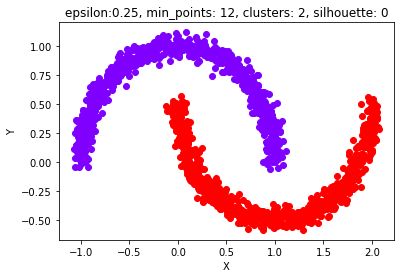

In [8]:
fig, ax = plt.subplots(1,1)
plot_cluster(db, clusters, sil, 0.25, 12, ax)

<h2>Clustering Evaluation and Parameter Tuning (60 Points)</h2>


<p style="text-align: justify;"><b>Evaluation metric:</b> implement the silhouette measure from scratch to evaluate quality of each clustering. Use the formula provided in <a href=https://en.wikipedia.org/wiki/Silhouette_(clustering)>here</a>  </p>

<p style="text-align: justify;"><b>Parameters tuning:</b> run your code with the provided parameter sets for each dataset. For each dataset, visualize the resulting clusterings for each parameter set. The title of each chart should follow this format:</p>

<p style="text-align: justify;">epsilon: value, min_points: value, k: value, silhouette: value (round to two decimal points)

<p style="text-align: justify;">Here is a sample chart from the moons dataset (note that we used a slightly different dataset so you may get a different clustering for this set of parameters).
</p>
<picture>
  <img src="Picture1.png" alt="moons" style="width:auto;">
</picture>

<p style="text-align: justify;">Plots should be generated in the increasing order of epsilons and then min_ponts, i.e.:</p>

    for epsilon in epsilons:
        for min_point in min_points:
            # generate clustering for epsilon and min_points and visualize

<p style="text-align: justify;">Note that your code has to visualize the clusterings only for one dataset at a time. This includes 9-12 plots (based on the possible combinations for the provided epsilon and min_points values for the given dataset) as explained above and 1 silhouette plot as follows (17 plots total):</p>

    •	x-axis: k (for k>=2)
    •	y-axis: silhouette scores
    •	title: dataset name

<p style="text-align: justify;">For example, in the below synthetic plot, there are three different clusterings for k=2, two clusterings for k=3, and four clusterings for k=4.</p>
<picture>
  <img src="Picture2.png" alt="synthetic" style="width:auto;">
</picture>

Parameter sets for the circles dataset:

    •	dataset_name = circles.csv'
    •	min_points = [12, 24, 48, 96]
    •	epsilons = [0.1, 0.2, 0.3]

Parameter sets for the aniso dataset:

    •	dataset_name = 'aniso.csv'
    •	min_points = [12, 24, 48, 96]
    •	epsilons = [0.2, 0.3, 0.5]

Parameter sets for the moons dataset:

    •	dataset_name = 'moons.csv'
    •	min_points = [10, 20, 30]
    •	epsilons = [0.07, 0.085, 0.1] 


<p style="text-align: justify;">For each dataset:</p>

<ul>
<li style="text-align: justify;">Explain what is the best number of clusters (k) based on the plots?</li>
<li style="text-align: justify;">Interpret the Silhouette plot. Does the Silhouette plot suggest the same k? Why?</li>
</ul>

In [9]:
def convert_to_df(db):
    df = pd.DataFrame()
    idx = 0
    for k, v in db.items():
        df.loc[idx, "x"] = k[0]
        df.loc[idx, "y"] = k[1]
        df.loc[idx, "cluster"] = v["cluster"]
        idx += 1
    return df

In [10]:
def mean_distance(i, points):
    distances = []
    for j,_ in enumerate(points):
        distances.append(euclidean_dis(i, points[j]))
    return np.mean(distances)

def silhoutte_coefficient(db, clusters):
    df = convert_to_df(db)
    for idx, point in df.iterrows():
        label = point["cluster"]
        if label != "outlier":
            if len(clusters) > 1:
                samelabel = df[df["cluster"] == label].copy()

                samelabel.drop([idx], axis = 0, inplace = True)
                a = mean_distance([point["x"],point["y"]], samelabel[["x","y"]].values)

                difflabel = df[(df["cluster"] != label) & (df["cluster"] != "outlier")].copy()
                bs = {k:None for k in difflabel["cluster"].unique()}

                for curlabel in difflabel["cluster"].unique():

                    diffdata = df[df["cluster"] == curlabel].copy()
                    bs[curlabel] = mean_distance([point["x"],point["y"]], diffdata[["x","y"]].values)
                b = np.min(list(bs.values()))
                df.loc[idx, "Silhoutte"] = (b - a)/np.max([a,b])
            else:
                df.loc[idx, "Silhoutte"] = 0
        else:
            df.loc[idx, "Silhoutte"] = 0
            
    return df.groupby("cluster")["Silhoutte"].mean().max()

In [11]:
def plot_clusters(dataset, min_points, epsilons):
    fig,ax = plt.subplots(nrows = len(epsilons), ncols = len(min_points), figsize = (40,30))
    ax = ax.flatten()
    idx = 0
    clus_num = []
    sils = []
    for epsilon in epsilons:
        for min_point in min_points:
            db, clusters = dbscan(dataset,epsilon,min_point)
            sil = silhoutte_coefficient(db, clusters)
            clus_num.append(len(clusters))
            sils.append(sil)
            plot_cluster(db, clusters, sil, epsilon, min_point, ax[idx])
            idx = idx + 1
    return clus_num, sils

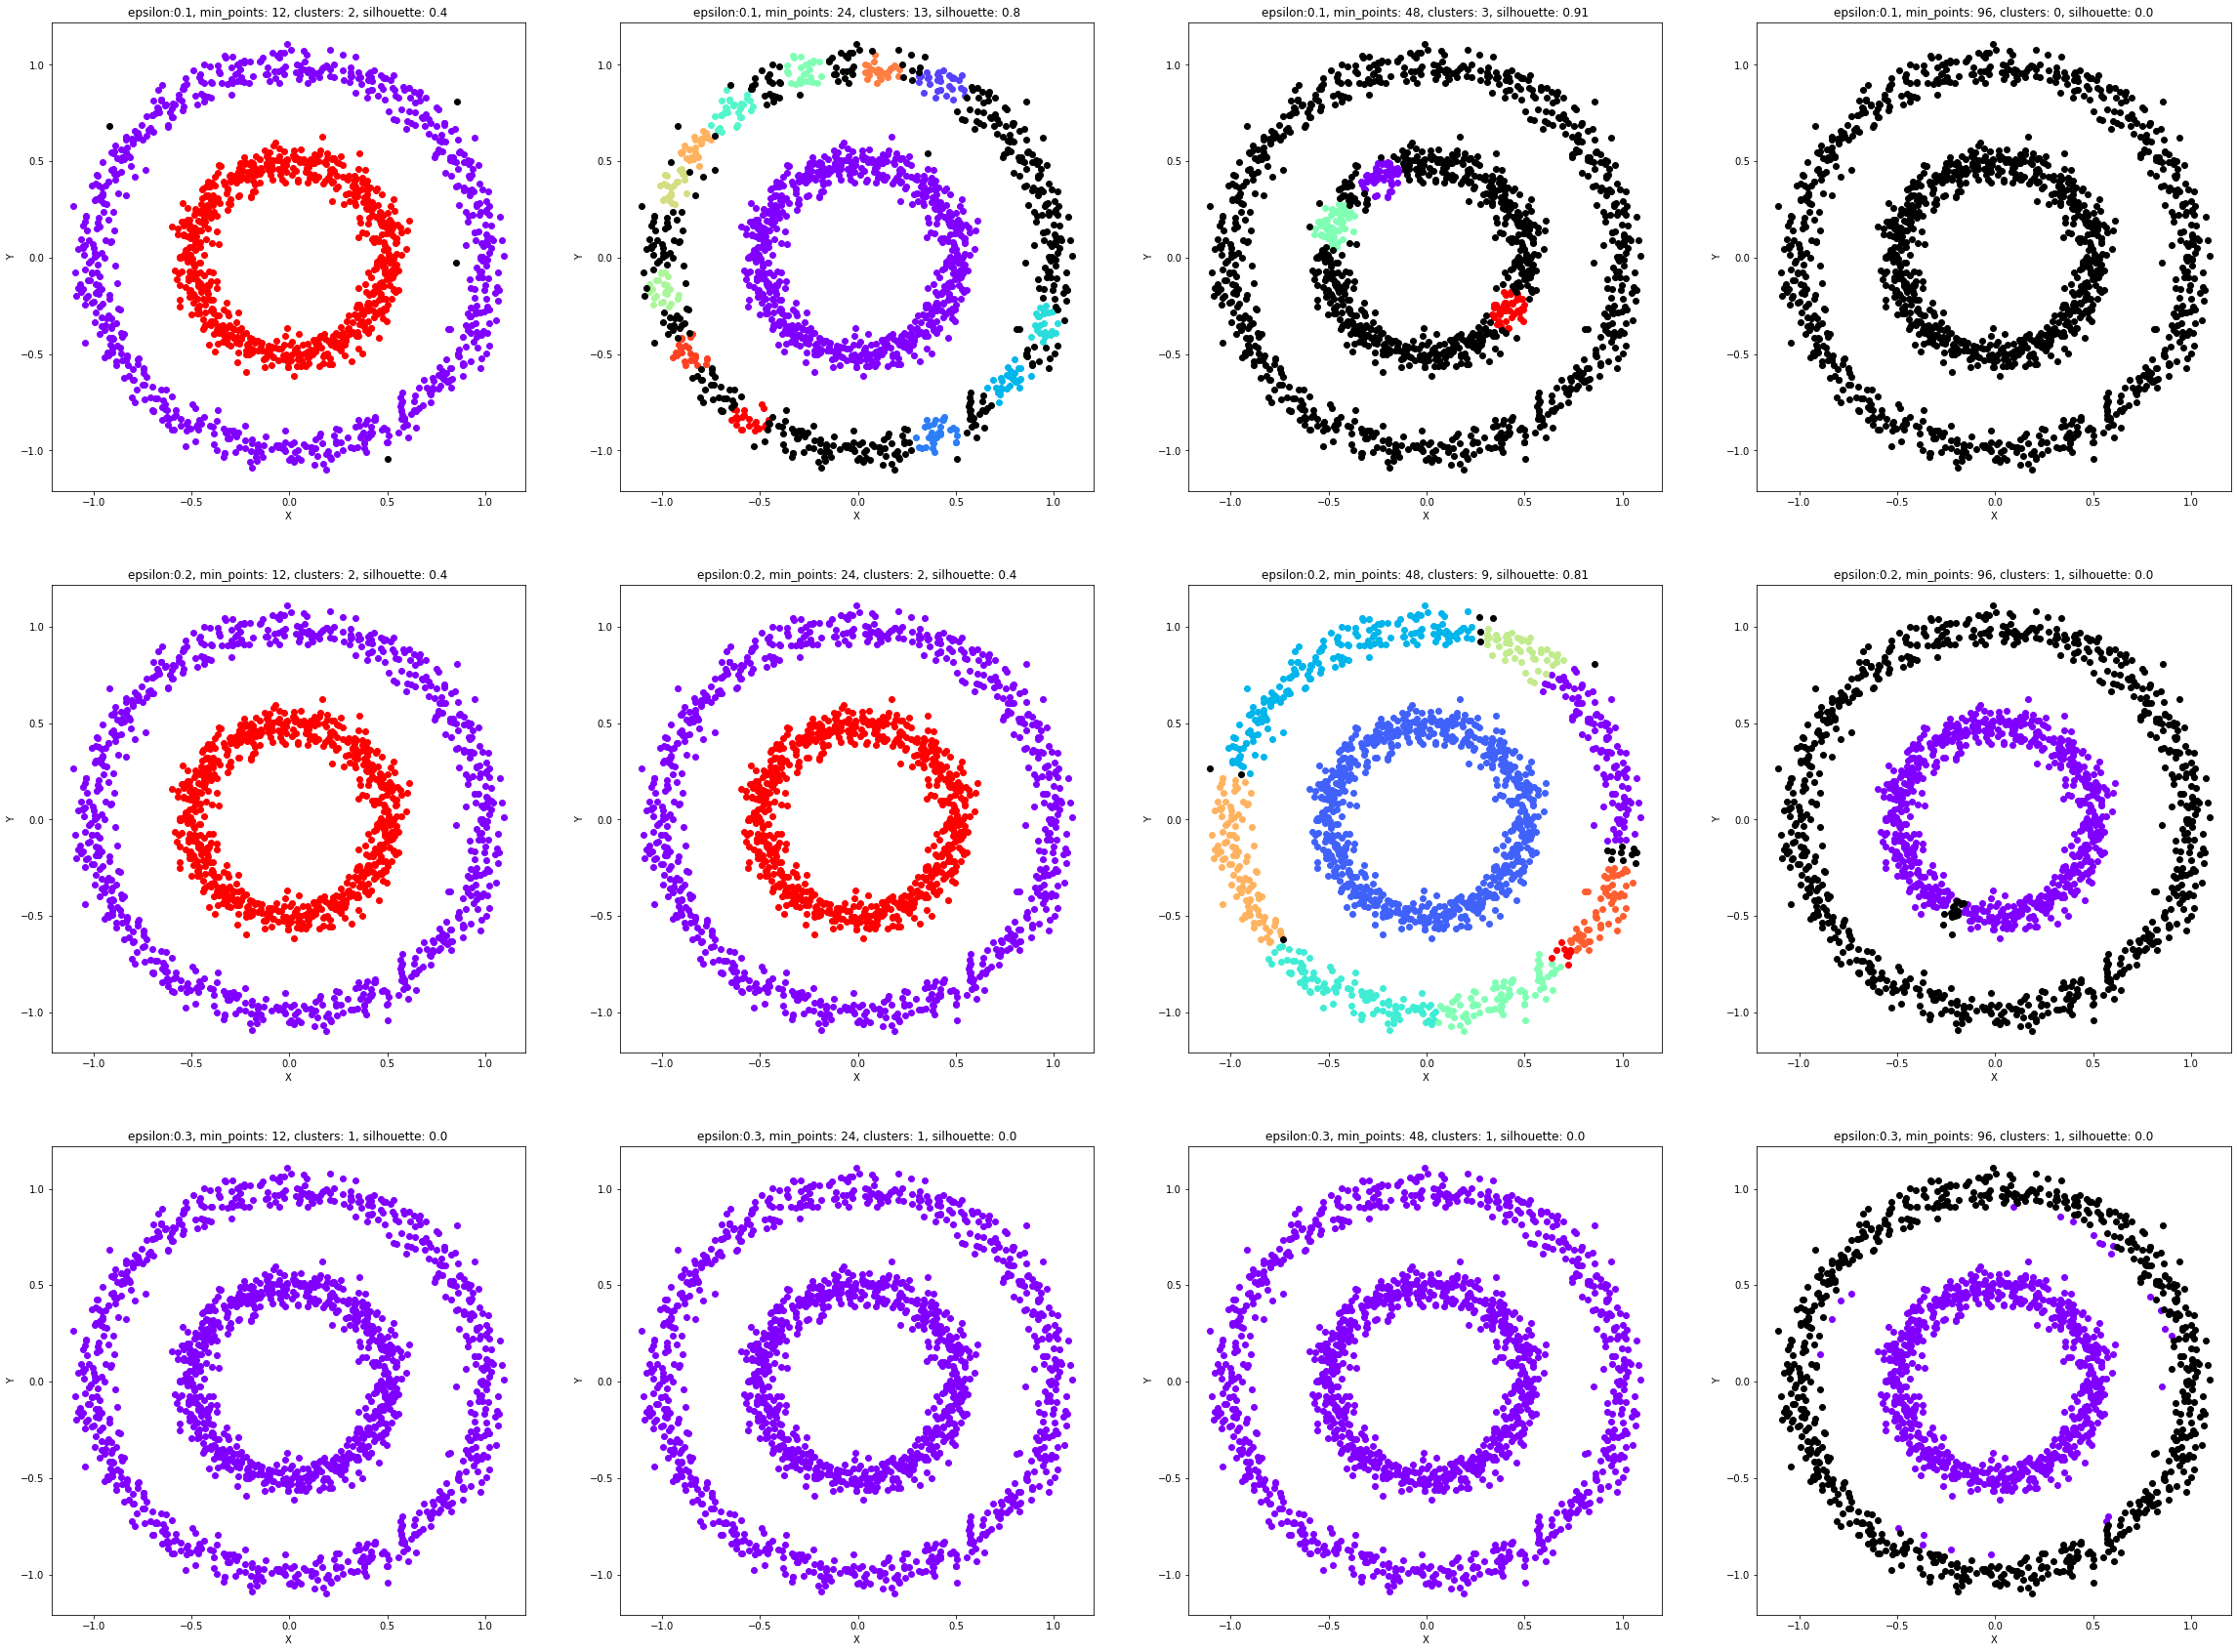

In [12]:
dataset_name = 'circles.csv'
min_points = [12, 24, 48, 96]
epsilons = [0.1, 0.2, 0.3]
dataset = pd.read_csv(dataset_name, names = ["point_x","point_y"])
clus_num, sils = plot_clusters(dataset, min_points, epsilons)        

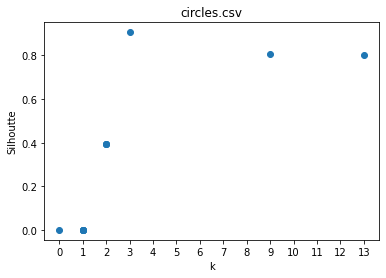

In [13]:
plt.scatter(clus_num, sils)
plt.title(dataset_name)
plt.xlabel("k")
plt.xticks(ticks = range(0,np.max(clus_num) + 1))
plt.ylabel("Silhoutte");

#### Explain what is the best number of clusters (k) based on the plots?
Based on the plots, the best number of clusters should be 2. The 2 concentric circles are being identified as two clusters.


#### Interpret the Silhouette plot. Does the Silhouette plot suggest the same k? Why?
Using the Silhouette plot, the value of k should be 3. Silhouette plot doesn't suggest the same k value here. This is probably due to the fact that plot with 3 clusters are more coherent even though there are lot of outliers. Other point is that there are less points to compare for in 3 clusters than in 2.

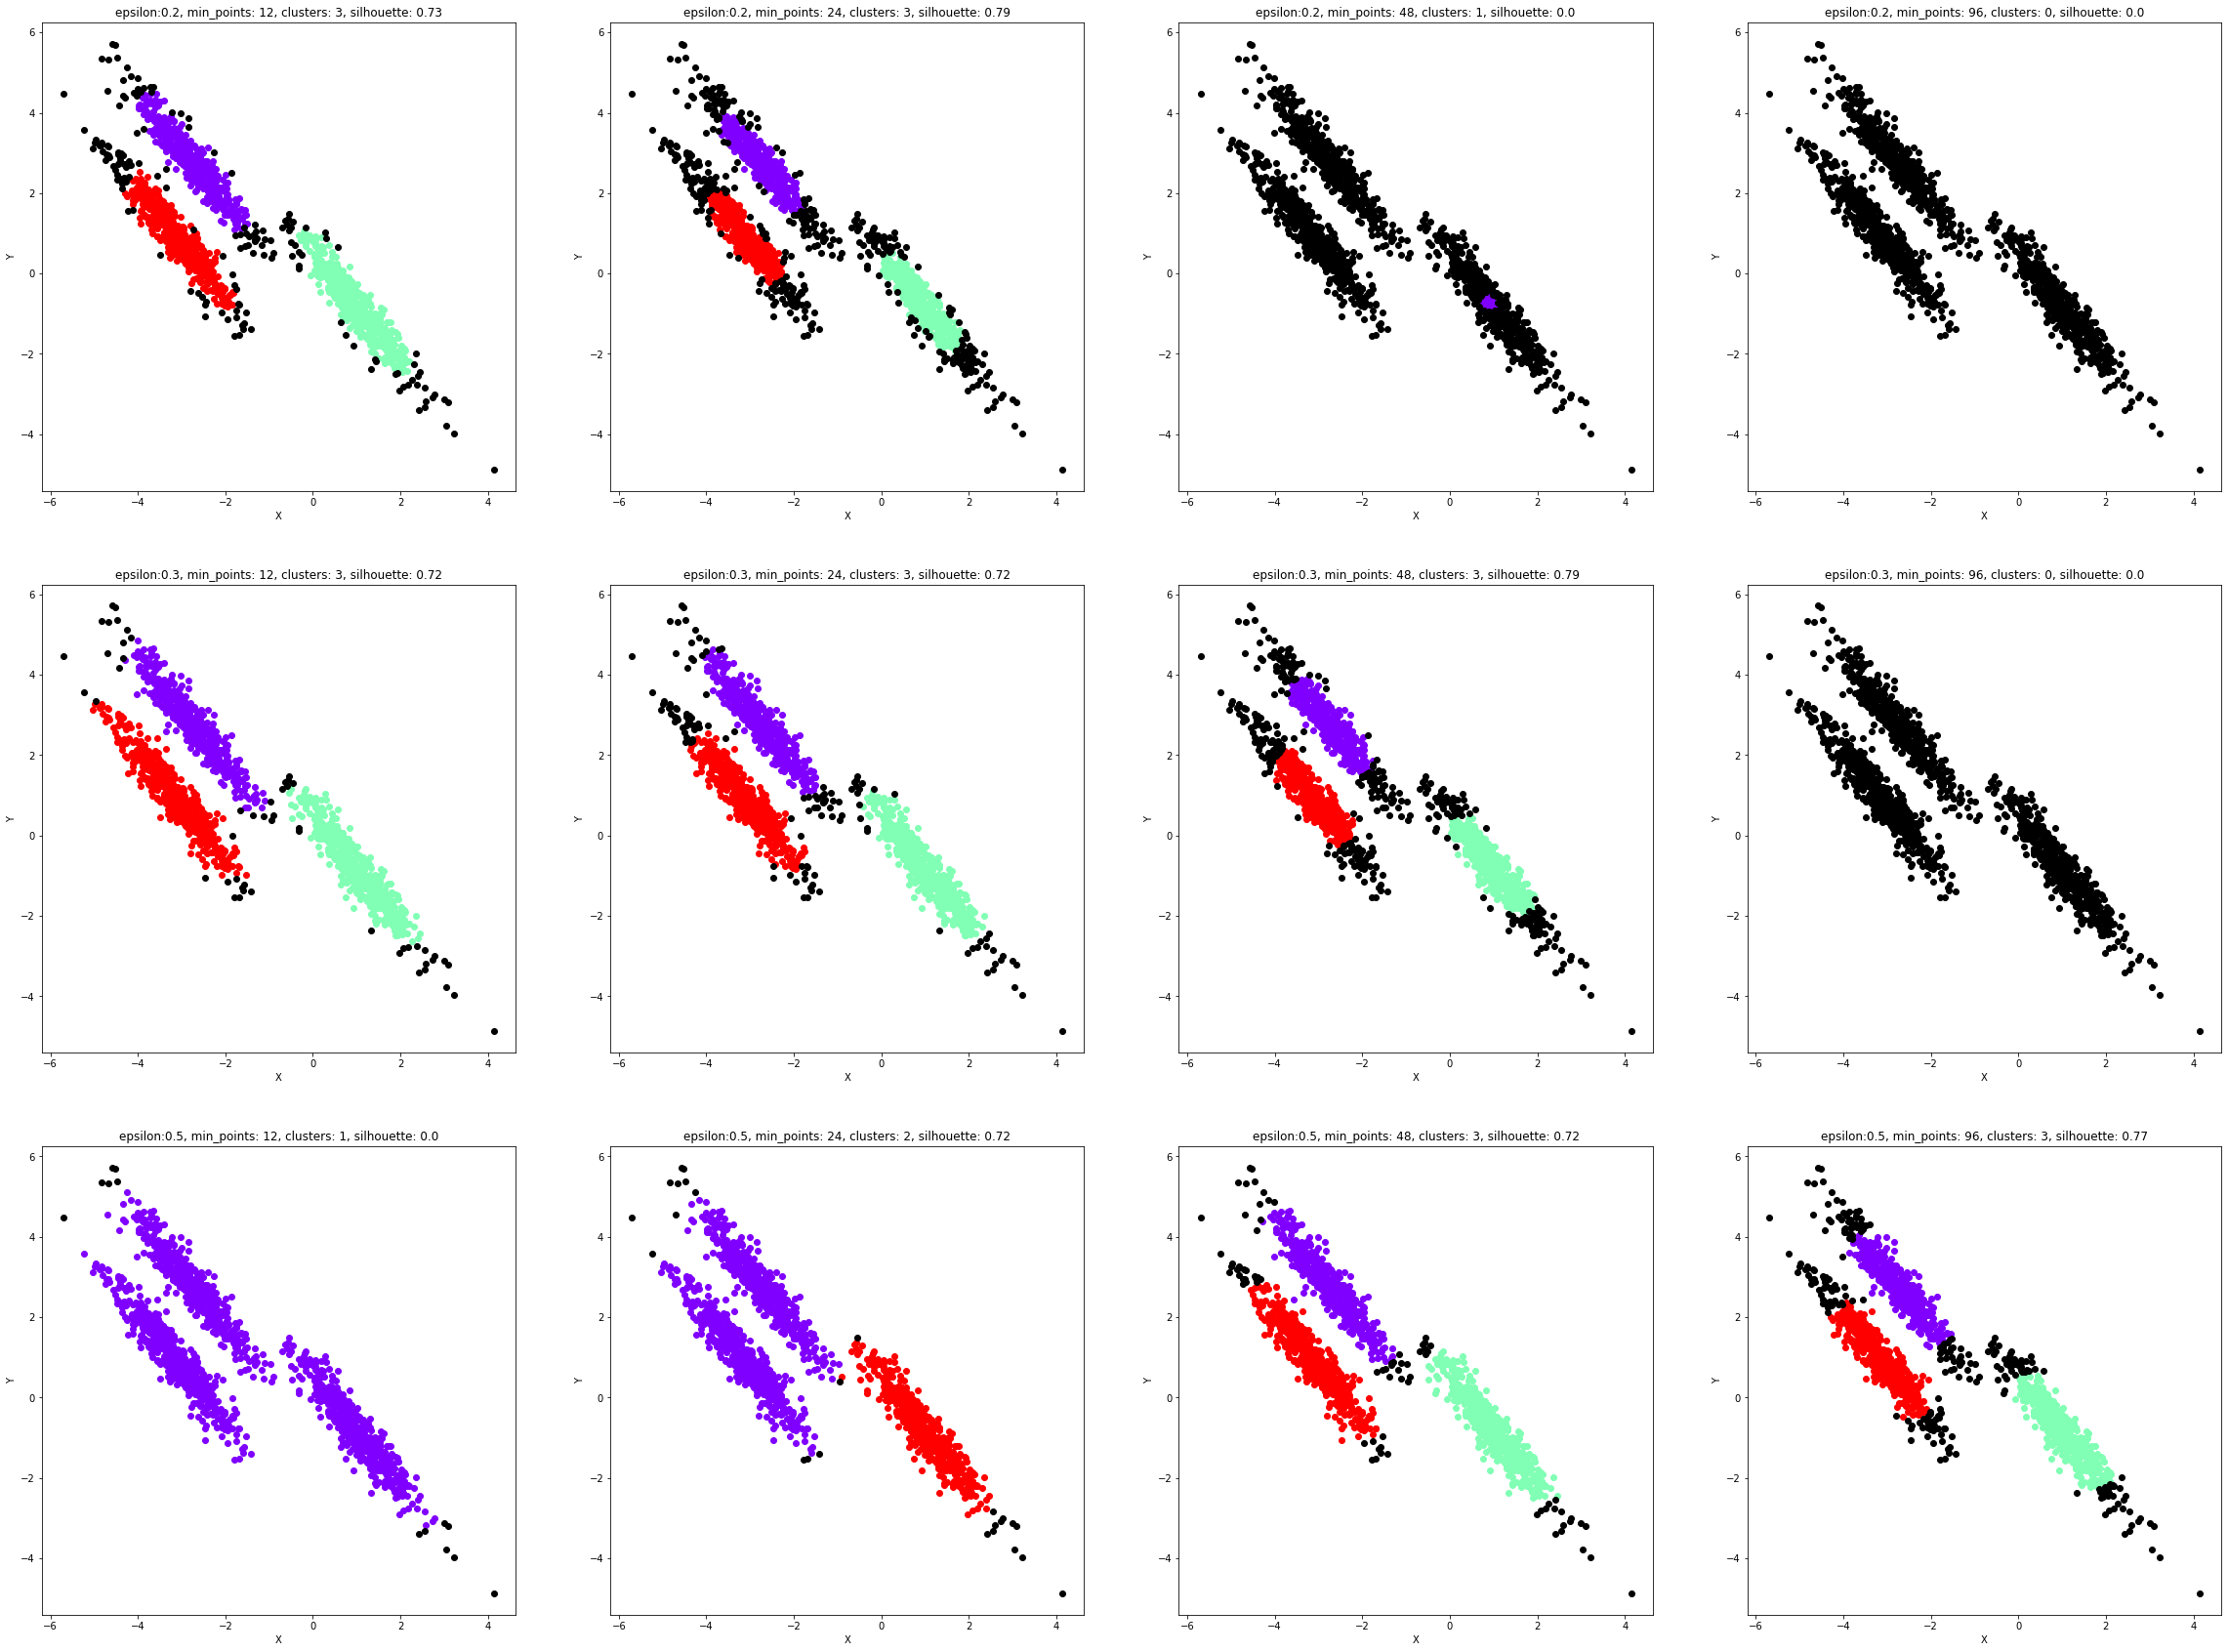

In [14]:
dataset_name = 'aniso.csv'
min_points = [12, 24, 48, 96]
epsilons = [0.2, 0.3, 0.5]
dataset = pd.read_csv(dataset_name, names = ["point_x","point_y"])
clus_num, sils = plot_clusters(dataset, min_points, epsilons)

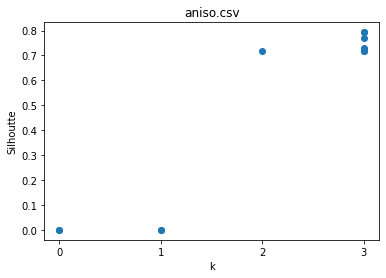

In [15]:
plt.scatter(clus_num, sils)
plt.title(dataset_name)
plt.xlabel("k")
plt.xticks(ticks = range(0,np.max(clus_num) + 1))
plt.ylabel("Silhoutte");

#### Explain what is the best number of clusters (k) based on the plots?
Best number of clusters (k) based on the plots should be 3.

#### Interpret the Silhouette plot. Does the Silhouette plot suggest the same k? Why?
From the Silhouette plot as well, the best number of clusters is 3. Highest value of Silhouette is coming out for 3 clusters. From the plots, 3 cluster seems most reasonable amongst others. 

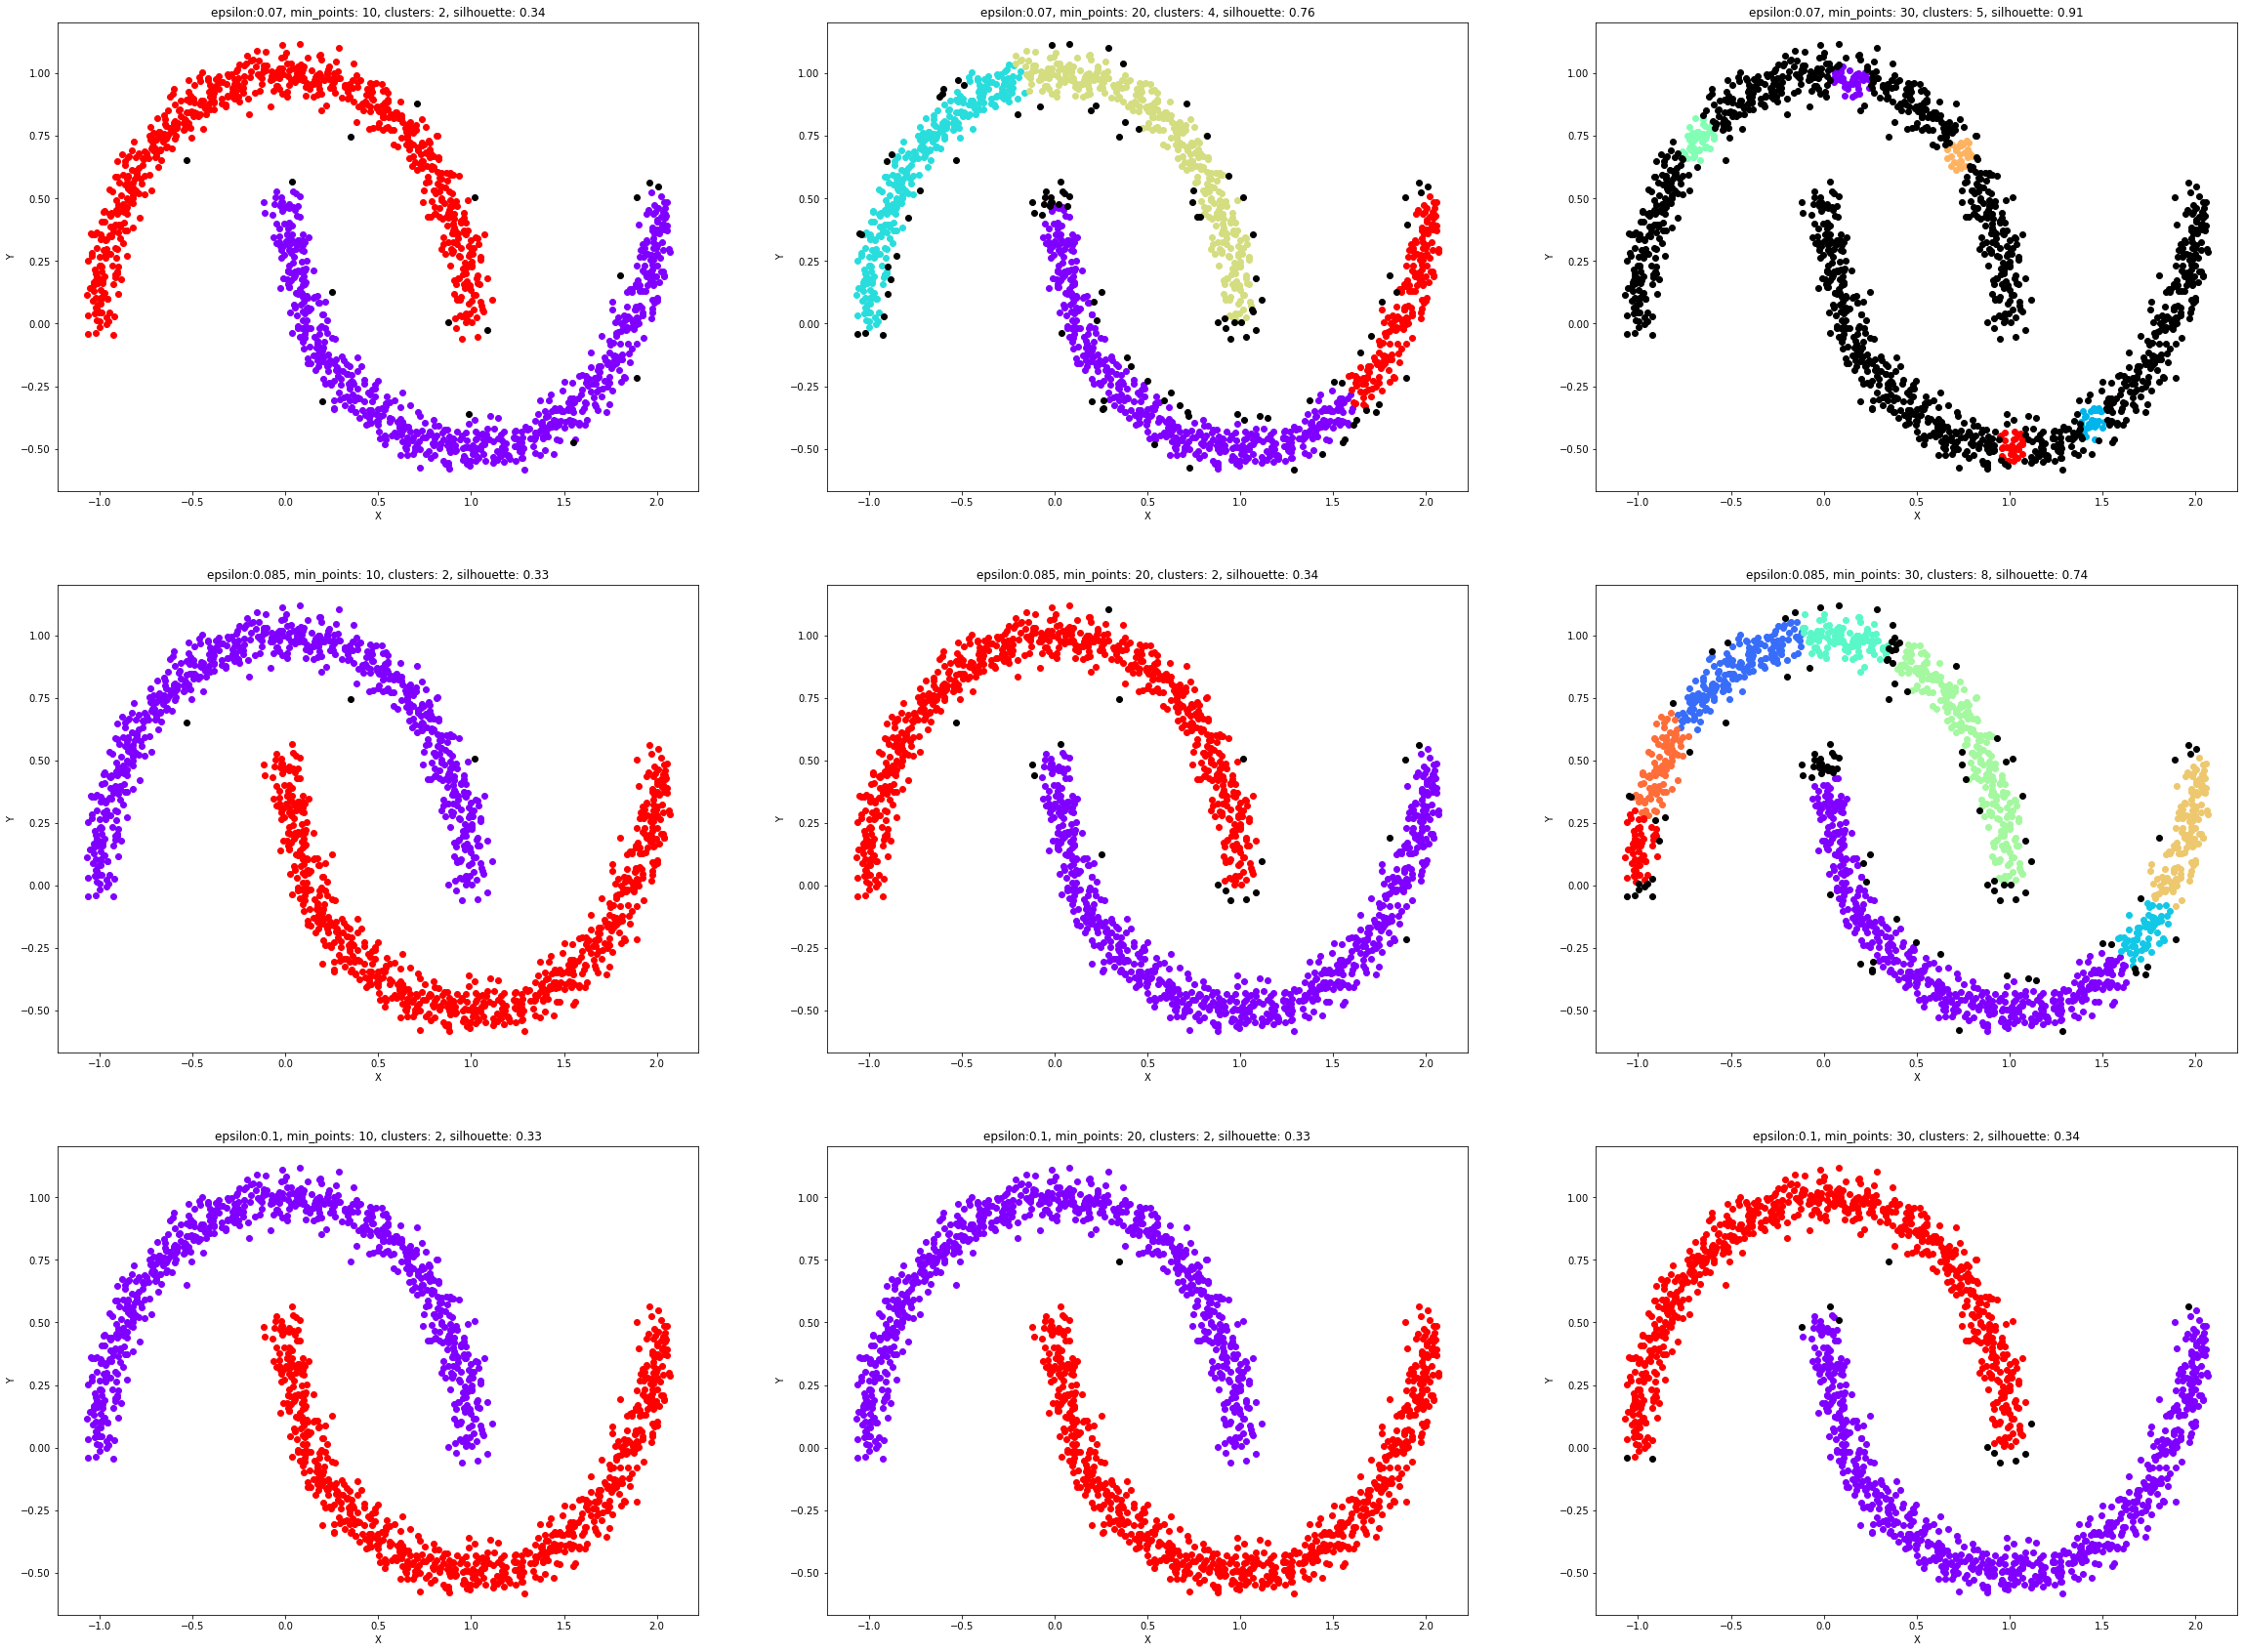

In [16]:
dataset_name = 'moons.csv'
min_points = [10, 20, 30]
epsilons = [0.07, 0.085, 0.1]
dataset = pd.read_csv(dataset_name, names = ["point_x","point_y"])
clus_num, sils = plot_clusters(dataset, min_points, epsilons)

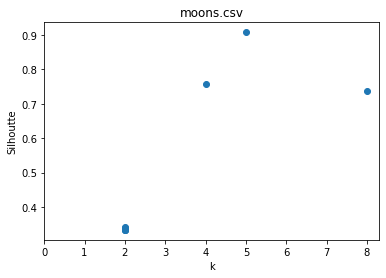

In [17]:
plt.scatter(clus_num, sils)
plt.title(dataset_name)
plt.xlabel("k")
plt.xticks(ticks = range(0,np.max(clus_num) + 1))
plt.ylabel("Silhoutte");

# Explain what is the best number of clusters (k) based on the plots?
The best number of clusters based on the plots is 2


# Interpret the Silhouette plot. Does the Silhouette plot suggest the same k? Why?
The best number of clusters from Silhouette plot is 5. Clusters from the plots and silhouette plots is not the same. This is because Silhouette value doesn't consider the number of outliers.

<h2>Submission</h2>

<p style="text-align: justify;">You need to submit a Jupyter Notebook (*.ipynb) file that contains your completed code. This notebook must generate the plots mentioned in Clustering Evaluation and Parameter Tuning.

    
<span style="background-color: #ffff99;">The file name should be in <strong>FirstName_LastName</strong> format</span>.</p>
<p style="text-align: justify;"><span style="background-color: #ffff99;">DO NOT INCLUDE EXTRA FILES, SUCH AS THE INPUT DATASETS</span>, in your submission;</p>
<p style="text-align: justify;">Please download your assignment after submission and make sure it is not corrupted or empty! We will not be responsible for corrupted submissions and will not take a resubmission after the deadline.</p>

<h2>Need Help?</h2>
<p>If you need help with this assignment, please get in touch with Erfan (on MS Teams or via email at <a href="mailto:erfan.jafarikhademzavareh@ucdenver.edu">Erfan.jafarikhademzavareh@ucdenver.edu</a>) or go to his office hours.</p>
<p>&nbsp;</p>
<p>You are highly encouraged to ask your question on the designated channel for Assignment 2 on Microsoft Teams (not necessarily monitored by the instructor/TA). Feel free to help other students with general questions. However, DO NOT share your solution.</p>